In [722]:
import numpy as np
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from math import ceil

In [597]:
d = pd.read_csv('./data/train_groups.csv')
d

pair_id  group_id  doc_id  target
0            1         1   15731       0
1            2         1   14829       0
2            3         1   15764       0
3            4         1   17669       0
4            5         1   14852       0
...        ...       ...     ...     ...
11685    11686       129   26672       0
11686    11687       129   25838       0
11687    11688       129   25703       0
11688    11689       129   27885       0
11689    11690       129   27987       0

[11690 rows x 4 columns]

In [545]:
def cleaner1(text_): 

    text_ = re.sub(r'\<[^>]*\>', ' ', text_) 

    return text_

In [583]:
# Чистим слова-помощники и теги html
def cleaner2(text_):
    bad_words_1 = [  'все', 'для', 'его', 'ему', 'или', 'так', 'что', 'чем', 'эти', 'быть',\
                        'если', 'есть', 'всех', 'про', 'при', 'того', 'либо','без', 
                        'был', 'вам', 'вас', 'ваш', 'вид', 'вкр', 'вот', 'всю',\
                        'вся', 'где', 'год',\
                        'дел', 'для', 'дня', 'еще', 'зао', 'игр', \
                        'или', 'имя', 'ищу', 'как', 'код', 'ком', 'кто', 'лет', \
                        'меж', 'мне', 'мог', 'мод', 'мои', 'мой', 'моя', \
                        'над', 'нам', 'нас', 'наш', 'нее', 'ней', 'нем', 'нео', 'нет', 'ним',\
                        'них', 'она', 'они', 'опа', \
                        'под', 'пол', 'пор', 'при', 'рад', 'рук', \
                        'сам', 'сей',\
                        'там', 'тем', 'тип', 'тож',\
                        'той', 'тот', 'тур', 'тут', 'удэ', 'уже',\
                        'эта', 'это', 'эту', 'буде', 'будь',
                        'была', 'были', 'было', 'вами', 'изза', 'меня', 'либо',\
                        'мной', 'моих', 'либо','надо', 'нами', 'наша', 'наше',\
                        'наши', 'нашу', 'него', 'нету', 'ниже', 'ними',\
                        'ныне', 'раза', 'разы','сама', 'сами', 'свое', 'свои',\
                        'свой', 'свою', 'своя', 'себе', 'себя','типа', 'типо',\
                        'таки', 'тебе', 'туда','хоть', 'хотя','чуть', 'чтобы',\
                        'этак','этим', 'этих', 'этой', 'этом', 'этот', 'ведь',\
                        'даже', 'имея', 'иную', 'себя', 'этого'
                     ]
    
    for i in bad_words_1:
        text_ = text_.replace(' ' + i + ' ', ' ')
        
    text_ = re.sub('\s+', ' ', text_)

    return text_

In [584]:
# # Данная функция возвращает текст, отсекая по заданному порогу наименее часто встречающиеся слова,
# # и слова меньше 3х и более 15 букв
# def words_freq_dict(text_, treshold):
#     frequency = dict()
#     wfd_text_ = str()
#     pattern = re.findall(r'\b[а-я]{3,15}\b', text_)
#     print(pattern)
#     for word in pattern:
#         wfd_text_ += word + ' '
#         count = frequency.get(word,0)
#         frequency[word] = count + 1
    
#     list_fr = list(frequency.items())
#     list_fr.sort(key = lambda i: i[1])
#     list_fr.reverse()
    
#     for i in list_fr:
#         if i[1] < treshold:
#             wfd_text_ = re.sub(' ' + i[0] + ' ', ' ', wfd_text_)
        
    
#     return wfd_text_

In [585]:
# Данная функция возвращает текст, отсекая по заданному порогу наименее часто встречающиеся слова, 
# и слова меньше 3х и более 15 букв 
def words_freq_dict(text_, treshold): 
    wfd = str() 

    pattern = re.findall(r'\b[а-я]{3,15}\b', text_) 

    unique_ = np.unique(pattern, return_counts=True) 

    d = dict(zip(unique_[0], unique_[1])) 

    for i in pattern: 
        if d[i] > treshold: 
            wfd += ' ' + i + ' ' 

    return wfd

In [599]:
#Список имеет следующий вид: list = [text_1, text2, ... , textn]
def list_of_group(docs_id_):
    text_lists = list()
    for i in docs_id_:
        read_file = open('./content/' + str(i) + '.dat', 'r', encoding = 'utf-8')
        text_read = read_file.read().lower()
        text_read = cleaner1(text_read)
        text_read = words_freq_dict(text_read, 5)
        text_read = cleaner2(text_read)
        text_lists.append(text_read)
    return text_lists

In [602]:
def get_doc_id(group):
    d = pd.read_csv('./data/train_groups.csv')
    df_new = d[d.group_id == group]

    return df_new['doc_id']

In [588]:
# def words_freq_dict(text_, treshold): 

#     pattern = re.findall(r'\b[а-я]{3,15}\b', text_) 
# #     print(pattern)
#     wfd = ' '.join(pattern) 


# #     unique_, counts = np.unique(pattern, return_counts=True) 
# #     unique_ = unique_[np.where(counts<treshold)]
    
# #     for i in range(len(unique_)): 
# #         wfd = re.sub(' ' + unique_[i] + ' ', ' ', wfd) 

#     return wfd

In [589]:
#Получаем список подготовленных для tf_idf текстов из 1й группы
%time corpus = list_of_group(get_doc_id(1))

CPU times: user 2.18 s, sys: 120 ms, total: 2.3 s
Wall time: 2.4 s


In [590]:
corpus

[' можно можно можно можно которые можно скачать гта найти программы программы игры видео программы программы игры скачать видео скачать скачать скачать бесплатно игру установить драйвер после драйвер скачать бесплатно игры бесплатно прохождение скачать драйвер игры драйвер скачать бесплатно скачать гта окт окт драйвер скачать бесплатно гта мода теперь просто сайт больше найти теперь только когда теперь можно найти можно пока моды можно скачать виде мода игру подробнее игру игре теперь игры теперь после мода имеется имеется когда также игры один более более подробнее количество подробнее интернете подробнее игра игре средства криминальная россия средства теперь машины можно игре других время игры других папку установить игры играть сайт сайт игры сан андреас игре игра игрой можно играть гта сан андреас время игры игры том гта сан андреас раз больше игры гта сан андреас игры которые машины гта сан андреас игры нужно скачать установить папку игрой после играть гта сан андреас игры игре и

In [591]:
len(corpus[0])

5660

In [510]:
%time
vectorizer = TfidfVectorizer(min_df=0.01)
X = vectorizer.fit_transform(corpus)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs


In [511]:
len(corpus)

94

In [512]:
print(X[2].mean())

0.0006881121733298595


In [513]:
len(vectorizer.vocabulary_)

10727

In [514]:
vectorizer = CountVectorizer(max_features=1000)
X2 = vectorizer.fit_transform(corpus)

In [ ]:
print(X2.toarray()[10])

In [516]:
X = [[1, 1],
     [3, 4],
     [5, 8],
     [3, 3]]

Y = [[0, 0],
     [1, 2]]

X+Y

[[1, 1], [3, 4], [5, 8], [3, 3], [0, 0], [1, 2]]

In [517]:
distance = cdist(X, X, 'cityblock')
distance

array([[ 0.,  5., 11.,  4.],
       [ 5.,  0.,  6.,  1.],
       [11.,  6.,  0.,  7.],
       [ 4.,  1.,  7.,  0.]])

In [518]:
np.concatenate((vec[:0],vec[1:]))

array([ 5., 11.,  4.])

In [519]:
a = np.asarray([np.concatenate((vec[:num],vec[num+1:])).astype(int) for num, vec in enumerate(distance)])


In [520]:
a = np.sort(a)
a

array([[ 4,  5, 11],
       [ 1,  5,  6],
       [ 6,  7, 11],
       [ 1,  4,  7]])

In [521]:
a = np.flip(a, axis=1)

In [522]:
a[:, :2]

array([[11,  5],
       [ 6,  5],
       [11,  7],
       [ 7,  4]])

In [693]:
def count_distances(docs):
    
    distance = cdist(docs, docs, 'cityblock')
    
    res = np.asarray([np.concatenate((vec[:num],vec[num+1:])).astype(int) for num, vec in enumerate(distance)])
    res = np.sort(res)[:, :20]
#     res = np.flip(res, axis=1)[:, :20]
    
    return res

In [692]:
count_distances(X2.toarray())

array([[ 2825,  2825,  2825, ...,  2814,  2812,  2810],
       [  110,   106,   104, ...,    90,    89,    73],
       [  320,   320,   319, ...,   311,   307,   306],
       ...,
       [18098, 18087, 18057, ..., 14680, 14533, 12952],
       [20104, 20019, 19989, ..., 15599, 15526, 13317],
       [   36,    36,    35, ...,    20,    20,    20]])

In [639]:
def features_save(group_num, max_f=100, vec_type=1):
    
    corpus = list_of_group(get_doc_id(group_num))
    
    if vec_type == 1:
        vectorizer = CountVectorizer(max_features=max_f)
        X = vectorizer.fit_transform(corpus)
        
    elif vec_type ==2:
        vectorizer2 = CountVectorizer(max_features=max_f)
        X = vectorizer2.fit_transform(corpus)
#     print(vectorizer.vocabulary_)
    features = count_distances(X.toarray())

    np.save('group_features/{}'.format(group_num), features)
    return features

In [678]:
len(features_save(2, 200))

94

In [ ]:
test = np.load('group_features/2.npy')

In [733]:
def graph_features(imp_word_num=[1000], method='mean', group_num=1, threshold=500):
    
    size = ceil(np.sqrt(len(imp_word_num)))

    fig, axes = plt.subplots(size, size)
    fig.set_figheight(16)
    fig.set_figwidth(20)
    
    d = pd.read_csv('./data/train_groups.csv')
    df = d[d.group_id == group_num]
    df = df[['target']]

    for i in range(size):
        for j in range(size):
            
            if i*size+j >= len(imp_word_num):
                break
                
            features_save(group_num, imp_word_num[i*size+j], 1)
            test = np.load('group_features/{}.npy'.format(group_num))

            df_new = df
            df_new['features_mean'] = np.mean(test, axis=1)
            df_new['features_min'] = np.min(test, axis=1)
            df_new['features_max'] = np.max(test, axis=1)
            if threshold is not None:
                df_new = df_new[df_new.features_mean<threshold]

            if method == 'mean':
                bad = df_new[df_new.target==0]['features_mean']
                axes[i, j].scatter( range(len(bad)), bad, color='Purple')

                good = df_new[df_new.target==1]['features_mean']
                space = np.linspace(0, len(bad), len(good), endpoint=False)
                axes[i, j].scatter(space, good)
                
            elif method == 'min_max':
                bad = df_new[df_new.target==0][['features_min', 'features_max']]
                axes[i, j].scatter( bad['features_min'] , bad['features_max'], color='Purple')

                good = df_new[df_new.target==1][['features_min', 'features_max']]
                axes[i, j].scatter( good['features_min'] , good['features_max'],)

            print('Количество важных слов = {}, количество доков в диапазоне до {} = {}'.\
                  format(length[i*size+j], threshold, len(df_new)))

            axes[i, j].set_title('words num = {}'.format(length[i*3+j]))
        
    plt.subplots_adjust(wspace=0.15, hspace=0.15) 

Количество важных слов = 350, количество доков в диапазоне до 300 = 58
Количество важных слов = 400, количество доков в диапазоне до 300 = 56
Количество важных слов = 500, количество доков в диапазоне до 300 = 54
Количество важных слов = 1000, количество доков в диапазоне до 300 = 48
Количество важных слов = 2000, количество доков в диапазоне до 300 = 46
Количество важных слов = 3000, количество доков в диапазоне до 300 = 46


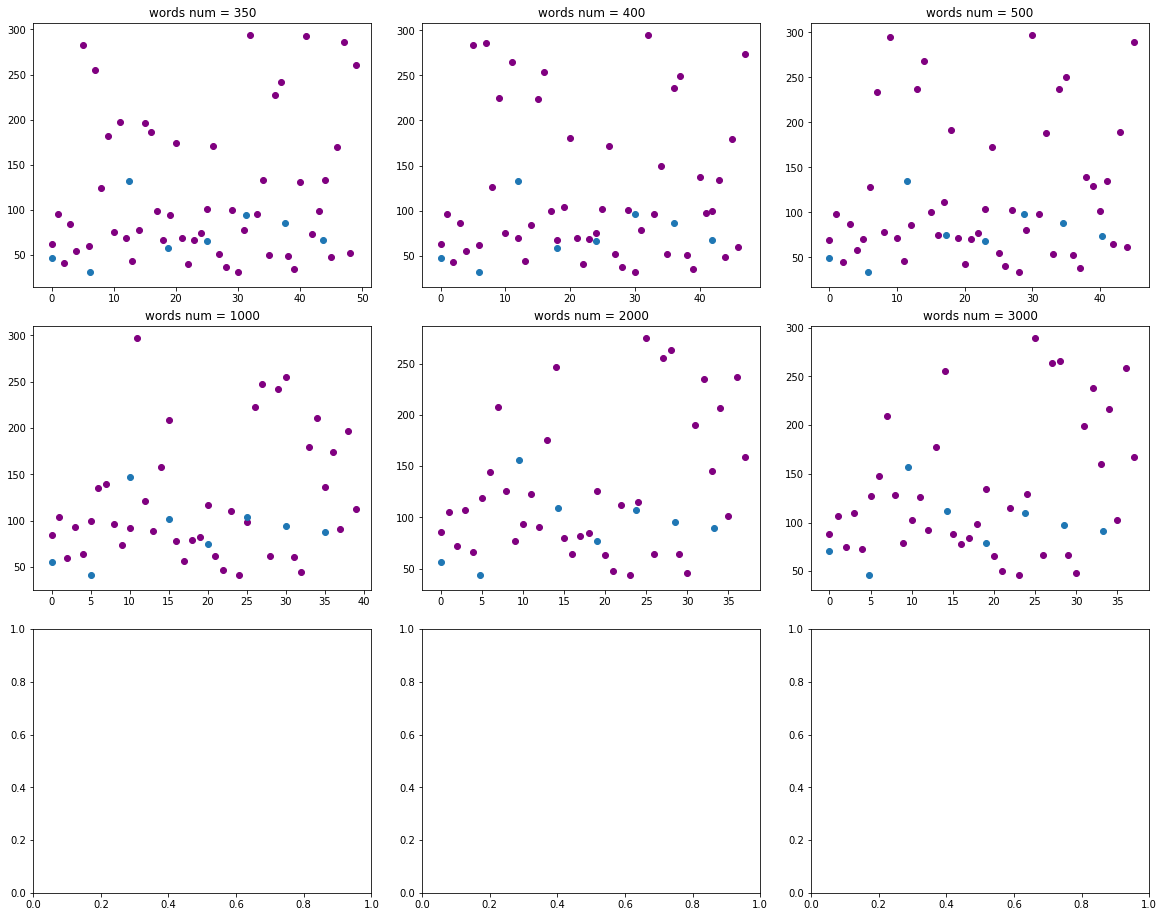

In [735]:
length = [100, 150, 200, 250, 300, 350, 400, 500, 1000,]
length = [350, 400, 500, 1000, 2000, 3000]
graph_features(length, 'mean', 1, 300)

In [531]:
def ndarray_to_list(array):
    
    return list(map(lambda x: list(x), array))

In [532]:
len(ndarray_to_list(test))

94

In [533]:
def main_parser_and_saver(start_group, finish_group):
    
    for group_num in range(start_group, finish_group + 1):

        features_save(group_num)
    
    return True

In [604]:
def all_group_feature_list(start_group, finish_group):
    
    res = []
    
    for group_num in range(start_group, finish_group + 1):
        res += ndarray_to_list(np.load('group_features/{}.npy'.format(group_num)))
        
    return res

In [610]:
main_parser_and_saver(1, 129)

True

In [611]:
groups = all_group_feature_list(1, 129)

In [622]:
np.load('group_features/100.npy')

array([[129, 170, 180, ..., 209, 211, 214],
       [  7,  14,  15, ...,  42,  42,  46],
       [ 39,  45,  46, ...,  69,  70,  71],
       ...,
       [146, 155, 157, ..., 178, 178, 181],
       [129, 143, 149, ..., 176, 177, 178],
       [ 94,  99, 101, ..., 118, 119, 121]])

In [619]:
mean = np.mean(groups, axis=1)

In [623]:
np.max(mean)

178089.05

In [669]:
d = pd.read_csv('./data/train_groups.csv')
df_new = d[d.group_id == 1]
df_new = df_new[['target']]
df_new

target
0         0
1         0
2         0
3         0
4         0
..      ...
97        0
98        1
99        0
100       0
101       0

[102 rows x 1 columns]